# Analysis of a Simple Evolutionary Algorithm

#### Created by Nick Lippman
#### INFO 3440 Python Final Project
#### Created 3/9/2019
#### Updated 3/19/2019

## Overview

The purpose of this project is to develop a simple evolutionary algorithm designed specifically to solve traveling salesmen problems. The ultimate goal of this evolutionary algorithm is to be able to match and/or beat the performance of excel's evolutionary solver. The simple evolutionary algorithm used in this analysis is developed with all of the core components of any evolutionary algorithm, including Crossover, Mutation, and Selection. Crossover is handeled through a simple order crossover, mutation is handled through single point swapping mutation, and fitness is calculated based on the performance of the sequence against the rest of its generation. Analysis on the effect of these features of the algorithm is included below.

In [2]:
#Import of all libraries used in this notebook. Genetic_Algo is included in the zip file with this notebook
import Genetic_Algo
import pandas as pd
import numpy as np
%matplotlib inline

#### Datasets
Three datasets have been included in the Test_Data.xlsx file included in the zip file. These data set each represent a different traveling salesman problem with varrying levels of difficulty to solve. The simple dataset includes 6 'locations' that are the decision variables with a total possible combination of 720 sequences. The Med dataset includes 7 'locations' that are the decision variables with a total possible combination of 5040 sequences. The Comp dataset includes 12 'locations' that are the decision variables with a total possible combination of 479,001,600 sequences.

In [3]:
#load the dataset used in analysis from Test_Data.xlsx
simple = pd.read_excel('Test_Data.xlsx',sheet_name='Simple')
Med = pd.read_excel('Test_Data.xlsx',sheet_name='Med')
Comp = pd.read_excel('Test_Data.xlsx',sheet_name='Complex')

#### Using the Algorithm
The evolutionary algorithm is contained in the Genetic_Algo.py file imported at the top of this notebook. The complexities of the algorithm are packed neatly into a single function that is used to invoke the solver. The TSPsolver function takes 7 arguments and outputs a dictionary containing the optimal objective function value as a key and a list of lists that contains all of the sequences of decision variable found the produce the optimal solution. 
#### Arguments for the function TSPsolver(DF,decisions,pop_size,mutation_rate,improved,cutoff,seed):
    -DF: Pandas DataFrame containing a square array of the coefficients for the decision variables.
    -decisions: The number of decsion variables.
    -pop_size: The size of the population for each generation.
    -mutation_rate: Number between 0 and 1 that represents percent of population that is mutated in each generation.
    -improved: The number of generations that must pass without improvement for the optimal solution to be returned.
    -cutoff: Number between 0 and 1 that represents percent of population that is kept based on fitness for next generation.
    -seed: The random seed used to initialize the problem.

### Proving the Algorithm's Accuracy
The simple and Med datasets are used to prove that the TSPsolver evolutionary algorithm finds valid solutions. The results found by the excel evolutionary solver are used to bench mark the TSPsolver solutions. For the simple data set excel found an optimal solution of 167 and for the Med dataset excel found an optimal solution of 88.

In [4]:
#run TSPsolver for simple dataset
Genetic_Algo.TSPsolver(simple,6,100,.8,10,.5,10)

{167: [[1, 2, 3, 5, 4, 0],
  [2, 0, 1, 3, 5, 4],
  [0, 1, 2, 3, 5, 4],
  [1, 2, 3, 5, 4, 0],
  [1, 2, 3, 5, 4, 0],
  [3, 5, 4, 2, 0, 1],
  [4, 2, 0, 1, 3, 5],
  [4, 2, 0, 1, 3, 5],
  [0, 1, 3, 5, 4, 2],
  [5, 4, 0, 1, 2, 3],
  [5, 4, 2, 0, 1, 3],
  [0, 1, 2, 3, 5, 4]]}

In [5]:
#run TSP solver for Med dataset
Genetic_Algo.TSPsolver(Med,7,300,.8,25,.5,10)

{88.0: [[2, 4, 1, 5, 6, 3, 0],
  [3, 0, 2, 4, 1, 5, 6],
  [6, 3, 0, 2, 4, 1, 5],
  [2, 4, 1, 5, 6, 3, 0],
  [6, 3, 0, 2, 4, 1, 5],
  [1, 5, 6, 3, 0, 2, 4],
  [3, 0, 2, 4, 1, 5, 6],
  [4, 1, 5, 6, 3, 0, 2],
  [1, 5, 6, 3, 0, 2, 4],
  [3, 0, 2, 4, 1, 5, 6],
  [4, 1, 5, 6, 3, 0, 2],
  [1, 5, 6, 3, 0, 2, 4]]}

Based on the above outputs, we can see that the TSPsolver algorithm finds the same optimal solution as the excel solver while outputting more than just 1 solution sequence.

### Solving a Traveling Salesman Problem
Now that the validity of the algorithm has been established it will be used to solve a traveling salesman problem with 12 decision variables. In this problem the route has 12 required stops and the distances between each stop are listed in the Comp data frame. When Using Excel, the optimal distance traveled for this problem is 8822 miles.

In [12]:
#run TSPsolver for 12 variable problem
Genetic_Algo.TSPsolver(Comp,12,9800,.2,1,.5,10)

{8822.0: [[3, 0, 4, 2, 1, 11, 9, 6, 5, 7, 10, 8]]}

The output of the problem shows that an optimal solution of 8822 is found, matching the excel answer. It should be noted that Excel takes approximately 20 seconds to find this solution (depending on computer speed), while the TSPsolver algorithm is significantly faster.

### Sensitivity Analysis
The following sensitivity analysis looks at the effects that changing certain input variables has on the TSPsolver algorithm. The changed variables are the Population size ranging between 100 and 10,000 in increments of 50, the Mutation rate from 0 to 1 in .1 increments, the Generations ranging between 1 and 500 with an increment of 1, the cuttoff value ranging from .1 to 1 in increments of .1, and the random seed ranging from 1 to 100 with increments of 1. When not being changed the following values were used for each input: Population=1,000 Mutation=.2 Generations=50 Cuttoff=.5 Seed=10.

In [23]:
#import cached data from cached_output2.xlsx
cache_Pop = pd.read_excel('cached_output2.xlsx',sheet_name='population')
cache_Mut = pd.read_excel('cached_output2.xlsx',sheet_name='mutation')
cache_Gen = pd.read_excel('cached_output2.xlsx',sheet_name='generations')
cache_Cut = pd.read_excel('cached_output2.xlsx',sheet_name='cuttoff')
cache_Seed = pd.read_excel('cached_output2.xlsx',sheet_name='seed')

#### Population Sensitivity

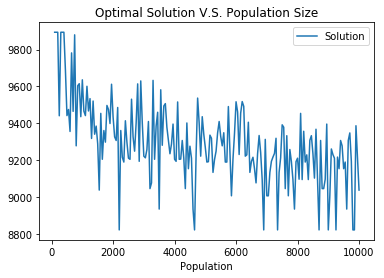

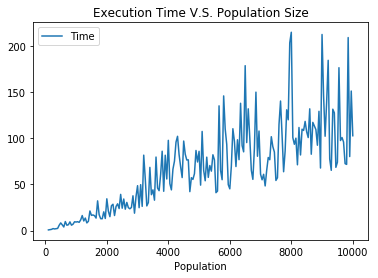

In [15]:
#Plot Population Sensitivity Data
cache_Pop.columns = ['Population','Solution','Time']
cache_Pop.plot.line(x=0,y=1,title='Optimal Solution V.S. Population Size')
cache_Pop.plot.line(x=0,y=2,title='Execution Time V.S. Population Size')

#### Mutation Sensitivity

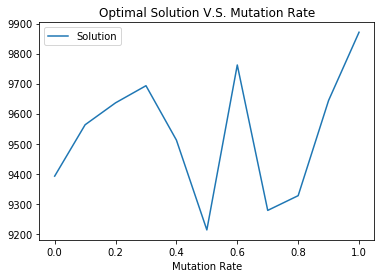

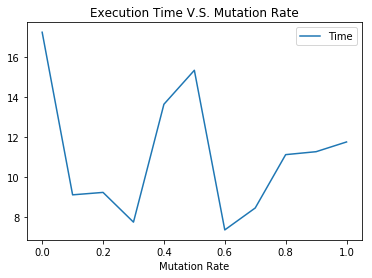

In [17]:
#Plot Mutation Sensitivity Data
cache_Mut.columns = ['Mutation Rate','Solution','Time']
cache_Mut.plot.line(x=0,y=1,title='Optimal Solution V.S. Mutation Rate')
cache_Mut.plot.line(x=0,y=2,title='Execution Time V.S. Mutation Rate')

#### Generation Sensitivity

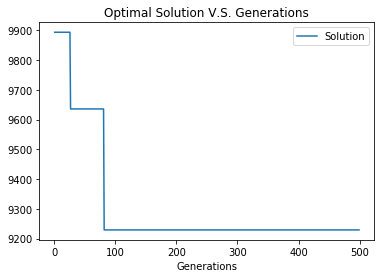

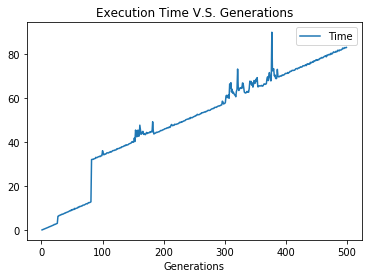

In [19]:
#Plot Generation Sensitivity Data
cache_Gen.columns = ['Generations','Solution','Time']
cache_Gen.plot.line(x=0,y=1,title='Optimal Solution V.S. Generations')
cache_Gen.plot.line(x=0,y=2, title='Execution Time V.S. Generations')

#### Cuttoff Sensitivity

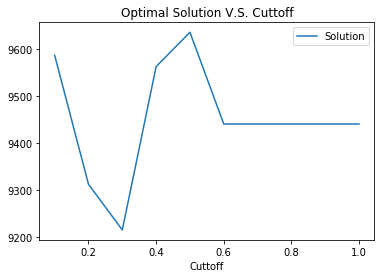

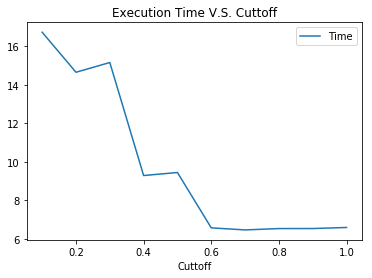

In [21]:
#Plot Cuttoff Sensitivity Data
cache_Cut.columns = ['Cuttoff','Solution','Time']
cache_Cut.plot.line(x=0,y=1,title='Optimal Solution V.S. Cuttoff')
cache_Cut.plot.line(x=0,y=2, title='Execution Time V.S. Cuttoff')

#### Seed Sensitivity

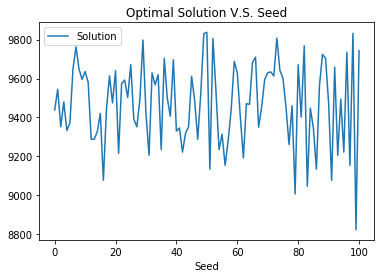

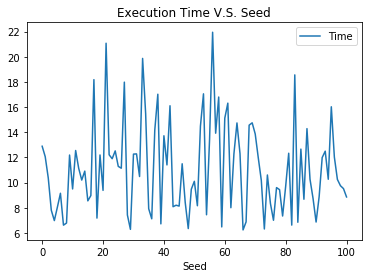

In [24]:
#Plot Seed Sensitivity Data
cache_Seed.columns = ['Seed','Solution','Time']
cache_Seed.plot.line(x=0,y=1,title='Optimal Solution V.S. Seed')
cache_Seed.plot.line(x=0,y=2, title='Execution Time V.S. Seed')

## Conclusion

The simple evoltuionary algortim used by the TSPsolver is a valid evolutionary solver, and has been validated against the results of the Excel evolutionary algorithm. The TSPsolver has been shown to produce the same optimal objective value with a shorter execution time when compared to Excel.

When analzing the sensitivity analysis it is apparent that the most important variable input for the evolutionary solver is the population size.As population size is increased, the optimal solution value shows a trend of decreasing. There is significant variation in the decrease of the optimal solution's value which is caused by the use of random sampling within the algorithm. 

Changing the number of generations without improvement up unitl approximately 100 generations also significantly imporves the results of the algorithm. After, 100 generations this improvemnt disappears and the results appear to remain stagnant. 

One thing of note is that, in general, the trend of change in execution time is inverted to the change in optimal solutiom. As the optimal solution improves (decreases), the execution time increases.


## References
https://conversionxl.com/blog/evolutionary-algorithms-optimization/
http://www.rubicite.com/Tutorials/GeneticAlgorithms/CrossoverOperators/Order1CrossoverOperator.aspx
